<a href="https://colab.research.google.com/github/Matt594/Intro-to-Deep-Learning/blob/master/MNIST_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interpretting a Convolutional Neural Network**

This notebook is a breakdown of convolutional neural networks with Keras. The goal of this notebook is to provide a compact reference for those with an entirely fresh background to computer science and/or machine learning. This is also just one out of three notebooks; the other two notebooks tackle multi-layer perceptrons (which I recommend viewing first) and recurrent neural networks.

A convolutional neural network is a deep learning structure commonly used to classify, or categorize, images. Thus, when an image is fed into a convolutional neural network, it's function is to determine what category the image fits in by looking for specific patterns. For people, this task is very simple; we can identify cars, birds, landscapes, hats, and more at a glance of an image. However, making an algorithm that quantifies patterns in images to 'learn' what they are is a different story. The convolutional neural network in this notebook will classify different articles of clothing into one of ten categories.

In each cell, I will attempt to provide a grounds-up explanation of the cell's contents, so the cell explanations may stray from machine learning concepts time to time and repeat content provided by the two other notebooks. Again, the goal of this notebook is to provide a reference for anyone to understand while remaining compact. If there's a topic you'd like to look into more, I've provided some extra sources of information in each cell.

Description of code cells should include:
1. Title: What topic(s) are being covered in the cell
2. Purpose: Goal of the cell
3. Execution: What the code is doing
4. Vocabulary/Concepts: Terminology and concepts for computer science of machine learning
5. General: Common principle/practice regarding cell operations and code
6. Interpretating Code: A guide to deciphering the cell's code
7. External Information: Sources for more information

In [0]:
#Import necessary libraries
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os

Using TensorFlow backend.


# **Import Statements**

This first cell imports modules to make the coding process simpler. With pre-made modules, the programmer doesn't have to reinvent the wheel. They can spend more time creating an applicable program and less time creating a modular foundation.

**Vocabulary/Concepts**
*   Importing...Makes data accessible from another module
  *   Module.......Collection of pre-made methods, classes, or programs

**Execution**

When a program calls for an import, the program searches for a module of the requested name on a system path.Though, before importing, modules must be downloaded or created so they have an address on the machine where the program is running. Once again, these are crucial because they'll save us time when creating our network; we won't need to create one from scratch.

**General** 
*   When importing, distinguish what modules must be used. No program needs to know every module on your machine.
*   Chunk imports together that are related to each other.
*   When importing created modules, like classes, it's best to keep all of the program's modules in one file so you don't need to change the system path.
*   Not every module is supported over multiple programming languages.
*   If you're having trouble with a particular task, look up modules for your programming language—you may find something incredibly useful to import.

**Interpretting Code**
*   "import" calls for modules to import
*   "from" specifies what should be imported from a module rather than importing the entire module
*   "as" changes how the module is called when it's used in the program
*   "keras" is a machine learning module for python that simplifies Google's Tensorflow
*   "numpy" is an array manipulation module for python
*   "matplotlib" is a data plotting module
*   "sklearn" is data mining and data analysis module
*   "os" is a python module for your machine's operating system

**External Information**
*   [Python Import System](https://docs.python.org/3/reference/import.html)
*   [Keras Documentation](https://keras.io)
*   [Numpy Documentation](http://www.numpy.org)
*   [Matplotlib Documentation](https://matplotlib.org)
*   [Sklearn Documentation](https://scikit-learn.org/stable/index.html#)
*   [Python Documentation](https://www.python.org)

These sources are great for interpretting what modules are being used in this notebook. If there is any uncertainty as to what operation is being done, it never hurts to look up the operation at the documentation's source.






In [0]:
#Suppress Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

# **Variable Initialization & Environmental Variables**

This cell suppresses warnings and disables debugging logs from Tensorflow. This is mostly just for preference since the program can operate without this line of code, but it makes the program notifications less annoying.

**Vocabulary/Concepts**
*   Variable Initialization.......Assigns a value to a variable
  *   Variable............................Stores data under a name and type
  *   Data..................................Information
*   Environmental Variable...A value that affects running process behavior

**Execution**

Variable initilization sets one variable equal to a value. In this case, an environmental variable is being set to the value "2" which will be relayed to Tensorflow in order to prevent debugging and warnings from being displayed. Again, this statement was included as a preference since the notifications can be distracting, but the network can operate without suppressing Tensorflow's warnings.

**General**
*   Environmental variables can alter the way your program runs so it is important to be aware of how each variable affects the program when coding. 
*   Variable initialization is a basic computer science operation. It is crucial in almost every program. 

**Interpretting Code**
*   "os" refers to the python operating system module
*   "environ['TF_CPP_MIN_LOG_LEVEL']" specifies the environmental variable being changed
*   "=" is an operator where the variable on the left side is set equal to the value on the right
*   "2" is the value that the environmental variable is set to which is one of the modes for tensorflow logging

**External Information**
*   [Python Operators](https://www.tutorialspoint.com/python/python_basic_operators.htm)
*   [Variable Intialization](https://stackoverflow.com/questions/23345554/the-differences-between-initialize-define-declare-a-variable)
*   [Environmental Variables](https://en.wikipedia.org/wiki/Environment_variable)
*   [Operating System Documentation](https://docs.python.org/2/library/os.html)









In [0]:
#Load and separate data into X: Features, Y: Labels
mnist_data = fashion_mnist.load_data()

x = mnist_data[0][0]
y = mnist_data[0][1]

# **Data Representation & Methods**

This cell initializes and separates the mnist data into the labels and inputs to later be interpretted by the neural network.

**Vocabulary/Concepts**
*   Methods......................Operations under a name that accomplish a task
*   Labels..........................The identification of data
*   Tuples, Arrays, Lists...Series of data


**Execution**

The first line of code initializes the data as a two-row tuple that contains a two-element tuple on each row using the ".load_data()" method. Next, x is initialized as the first element in the first tuple and y is initialized as the second element of the first tuple. This separates our labels and images, but there is still more to do before these two are usable by out neural network.

**General**
*   Methods and objects can be created by the programmer or can come from imported modules. They can be applied to class objects or can be applied using the import calls. Methods also often require parameters (which are placed between the parentheses) and can return a value. In this case, the ".load_data()" method returns a tuple of tuples.
*   There are three types of data in series:
  *   Tuples are denoted by brackets, are limited in size, can carry different objects, and cannot be edited once created. 
  *   Lists are denoted by parentheses, are unlimited in size, can carry different objects, and can be edited once created. 
  *   Arrays are denoted by brackets and are either created with the Python array module or the Numpy module. They are unlimited in size, carry one type of object, and can be edited once created. Additionally, they're valuable since they can undergo manipulation that affects the entire array.
*   Keep in mind that the elements in the tuples inside the tuple are arrays of numbers that represent pixel values
*   It is important to note that arrays, lists, and tuples follow a specific rule when they are indexed. For instance, let's assume "arr" is an array of 10 integers in sequence from 1 to 10.  arr[0] refers to the first integer in the array: 1. arr[1] refers to the second integer: 2. At the very end, arr[9] refers to 10. arr[10] would throw an error because it is out of bounds. Thus, when indexing or creating one of these three objects, always keep in mind that the index starts counting at [0] and ends at [(range) - 1].
*  "x" in machine learning always refers to the input data.
*  "y" in machine leanring always refers to the labels.

**Interpretting Code**
*   "mnist_data" is the tuple of tuples that stores the returned value of "fashion_mnist.load_data()"
*   "fashion_mnist" is the imported dataset from Keras
*   ".load_data()" is a method from Keras that returns data in a tuple of tuples
*   "x" is the variable that "mnist_data[0][0]" is assigned to; "[0][0]" denotes that the first element in the first tuple which, according to the Keras documentation, is x_train
*   "y" is the variable that "mnist_data[0][1]" is assigned to; "[0][1]" denotes that the second element in the first tuple which, according to the Keras documentation, is y_train

**External Information**
*   [Lists, Arrays, and Tuples](https://stackoverflow.com/questions/626759/whats-the-difference-between-lists-and-tuples)
*   [Array Indexing](https://en.wikipedia.org/wiki/Array_data_structure#Element_identifier_and_addressing_formulas)
*   [Methods](https://en.wikipedia.org/wiki/Method_(computer_programming)







In [0]:
#Set Variables
epochs = 50
num_classes = 10
batch_size = 1028
img_rows, img_cols = 28, 28

# **More Variable Initialization & ML Variables**

This cell initializes more variables that will be used for training and classification.

**Vocabulary/Concepts**
*   Epochs.................................Times a network runs through an entire dataset
*   Classes (Classification)......Number of categories a network can classify data into
*   Batches................................A group of training examples. The network can only update after training through all the examples in the batch. Important information from each example is saved for updating until the batch is completed
  *   Update..................................Synonym for backpropagate. Backpropagation occurs after each batch during training and will be discussed in the next cell
*   Image rows and columns....An image's number of horizontal and vertical lanes which consists of many pixels

**Execution**

Each line of code is initializing a separate variable which all take the form of integers. For the last line of code, two similar variables are grouped together and are initialized respectively. To do this, variables must be separated by a comma. These variables will be used later to instruct the neural network how long it should run for, what categories to classify data into, how many examples it should update after, and how many inputs it will need to digest.

**General**
*   You may wonder "why initialize a variable if it's just a number that can be hard-coded?" This highlights two more important aspect of variable initialization: labeling and multiple usage.
  *   Labeling numbers gives others a better understanding of what is being used. For example, a method that uses "epochs" as an input tells the reader more than a method that uses "50" as an input.
  *   Using a value multiple times without assigning it to a variable can lead future problems. For example, if you use "50" everywhere and you want to change all 50s to 40s, you'll have manually change every occurence of 50. If you assign 50 to "epochs", you can change the variable's value without manually finding every instance of the variable.
*   Group your initialized variables together; they'll be easier to find if you need to change their values.
*   Similar variables can be initialized together as seen above.

**Interpretting Code**
*   "epochs" is set to 50. This means the network will run through the entire training dataset 50 times
*   "num_classes" is set to 10. This means the network must classify an image into one of 10 classes
*   "batch_size" is set to 1028. This means the network will run through 1028 images before updating
*   "img_rows" and "img_cols" are set to 28. This denotes that each input image is a 28x28 array of pixels which will be important for inputting data into the network

**External Information**
*   [Epochs, Batches, & Iterations](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9)











In [0]:
#Split data into train & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# **Training Data & Testing Data**

This cell splits data into training data and test data using the method imported from sklean.model_selection called train_test_split(). Once again, there is more variable initialization.

**Vocabulary/Concepts**
*   Training.......................Trial runs on training data to fuel backpropagation
  *   Backpropagation......Mathematical analysis of loss to reduce future loss. Backpropagation occurs after a batch is completed. It is the source of a network's "learning" capabilities
  *   Loss...........................Also known as error. Measures how far off the network's classification is from the true value
*   Testing.........................Occurs after training to measure how well the machine has learned. Testing is a countermeasure to overfitting
  *   Overfitting..................Dilemma that occurs when an algorithm gets extremely good at classifying training data, but performs worse when classifying new data. Essentially, the machine has memorized the training data and ignores the patterns that can apply to new data
*   Training data...............Data the algorithm evaluates to backpropagate and improve
*   Test data.....................Data the algorithm evaluates so people can measure the algorithms's performance
*   Seed............................Ensures both data and labels are randomly split the same way since the labels must correspond to their data. Otherwise, the data will be nonsensical
  
**Execution**

The "train_test_split()" method from sklearn takes "x", "y", ".33", and "42" as parameters to return four arrays which are initialized a "x_train", "x_test", "y_train", and "y_test". These arrays will be used later to train the network to classify images optimally. However, the data is still not in a usable form.

**General**
*   Training data should be around twice as large as test data.
*   Don't let your machine train for too many epochs otherwise you risk overfitting
*   To gauge when your algorithm begins to overfit, keep track of metrics by printing out information as the machine trains

**Interpretting Code**
*   To return four arrays, "train_test_split()" is taking four parameters:
  *   "x" refers to the images
  *   "y" refers to the image labels
  *   "test_size=.33" refers to what proportion of the data should be test data (and consequentially what proportion should be training data)
  *   "random_state=42" is a seed for predictable randomness
*   "x_train", the training images, are assigned to the first element of the array returned by "train_test_split()"
*   "x_test", the testing images, are assigned to the second element of the array returned by "train_test_split()"
*   "y_train", the training labels, are assigned to the third element of the array returned by "train_test_split()"
*   "y_test", the testing labels, are assigned to the fourth element of the array returned by "train_test_split()"

**External Information**
*   [Scikit Learn's test_train_split() ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
*   [Training and Test Data](https://www.quora.com/What-is-a-training-data-set-test-data-set-in-machine-learning-What-are-the-rules-for-selecting-them)
*   [Backpropagation](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
*   [Overfitting](https://elitedatascience.com/overfitting-in-machine-learning)
*   [Random Seed](https://en.wikipedia.org/wiki/Random_seed)











In [0]:
#Making changes according to Backend
if K.image_data_format() == "channels first":
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

# **Data Formatting**

This cell reshapes image data depending on the image data format from Keras's backend, also known as the data access layer. Without this cell, the network may not operate properly due to misunderstood data.

**Vocabulary/Concepts**
*   Backend..............Data accessing layer to any piece of software.
*   Channels.............Channels of an image. A typical colored image has three channels for red, blue, and green colors. In this example, there is only one channel since the images are black and white.
*   If statements.......Prompted by "if". They compare two objects and validate whether the comparison is true or false. If the comparison is true, the code directly below the statement is executed. If the comparison is false, the code directly below the statement is skipped.
*   Else statements...Prompted by "else" and can only happen after "if statements". These execute when the if statement is false, but something else must be executed that wouldn't normally be executed had the "if statement" been true.
*   Data Cleaning........Preparing data for analysis which includes formatting, checking for false records, checking for abnormalities, uniforming, etc.

**Execution**

The code first checks the demanded format by Keras. If it is on the "channels first" option, the image data is reshaped with the channel number before the rows and columns of the image. If it is not, the the channel number comes after the rows and columns of the image. This code just ensures that the network will understand the data it receives based on the backend that was used to construct it.

**General**
*   Formatting data and data cleaning is a necessary chore for machine learning to take place; abnormalities in formatting will result in poor results or errors. Luckily, the MNIST datasets are pre-cleaned, but in many cases, formatting and cleaning involve a lot more than rearranging arrays.
*   Backends, like environmental variables and documentation, are important to check to validate your code. You may have the correct data, but you may be implementing in a way that is incompatible with the backend.

**Interpretting Code**
*   "if" begins an "if statement" that determines whether or not Keras's "image_data_format()" is equal to "channels first" or not
*   "x_train" and "x_test" are reinitialized with the same contents but different shape using the "reshape()" method from numpy. The channel number "1" comes first under the "if statement"
*   "else" begins an "else statement" that executes code if the "if statement" is false
*   "x_train" and "x_test" are reinitialized with the same contents but different shape using the "reshape()" method from numpy. The channel number "1" comes last under the "else statement"
*   "input_shape" is also initialized which refers to the image rows, columns, and channels

**External Information**
*   [If Statements](https://codehs.gitbooks.io/introcs/content/Programming-with-Karel/if-else-statements.html)
*   [Backends](https://en.wikipedia.org/wiki/Front_and_back_ends)
*   [Data Cleaning](https://towardsdatascience.com/data-cleaning-101-948d22a92e4)









In [0]:
#Set astype on data to 'float32'
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 225
x_test /= 224
#Notes
#*Not converting array types into floats increases loss
#*Division seems to have no effect

# **More Data Formatting**

This cell does more data formatting operations on the image arrays by converting their stored variable types and doing some arraywide division.

**Vocabulary/Concepts**
*   Data type...Form data takes to represent itself
*   Float..........A number with a decimal
*   Integer.......A whole number

**Execution**

The first two lines of code reinitialize "x_train" and "x_test" once again, except now all of their elements are floats rather than integers. The last two lines of code divide every element in both arrays by 225 and 224 respectively. These floats will let the network make more precise measurements of error by enabling calculations to go below the 1's place.

**General**
*   Floats are generally more precise than integers.
*   There are many data types, but numerical data is the least complicated manipulate with machine learning.

**Interpretting Code**
*   ".astype()" is a numpy method that casts elements of an array into a new data type which is taking one parameter:
  *   "'float32'" denotes what datatype the data should be casted into
*   "/=" is an operator that divides the variable on the left by the value on the right. Then, it sets the variable equal to the quotient
*   The first two lines of code reinitialize "x_train" and "x_test" into arrays of floats
*   The last two lines of code divide "x_train" and "x_test" by 225 and 224 respectively

**External Information**
*   [Python Data Types](https://realpython.com/python-data-types/#floating-point-numbers)









In [0]:
#Converting class vector to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# **One-Hot Encoding**

This cell does more data formatting with the labels rather than the image arrays. 

**Vocabulary/Concepts**
*   One-hot encoding...Vector representation for labelling data. For example, [1, 0, 0], [0, 1, 0], [0, 0, 1] are all different identities in a list of three elements

**Execution**

The "y_train" and "y_test" array elements are all reinitialized as one-hot encoded labels. This enables for the network's output to be placed into a one-dimensional array which allows for an easy, side-by-side comparison between the one-hot label and one-dimensional output array of the network. The network's job is to make them as identical as possible by reducing loss. After this cell runs, the data is now ready to be used by the network.

**General**
*   One-hot encoding is typically used to label data because it matches the number of output neurons to the number of classes. This is a representation of data that is good to know when getting into classification problems using machine learning.

**Interpretting Code**
*  ".to_categorical()" is a keras.utils method that changes labels into a one-hot representation that is taking two parameters:
  *    "y_train" and "y_test" tell the method what labels need to be encoded 
  *    "num_classes" tess the method how many labels need to created
*  Both the training and test labels are being coverted into one-hot representations.

**External Information**
*   [One-hot encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)









In [0]:
#Defining the model (Hyper-opt: hyperparameter optimization)
# Hyperparams: Kernal size, node amounts, max pool size
model = Sequential()
model.add(Conv2D(32, 5, 5, activation="relu",input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, 5, 5, activation="relu",input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu")) # Hidden layer of plain neurons
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

# **Convolutional Neural Network Structure**

This cell builds the convolutional neural network which has some unique requirements compared to other neural networks.

**Vocabulary/Concepts**
*   Model..........................Synonym for "neural network"
*   Neurons......................The functional unit of any neural network. Conduct specialized operations on input data.
*   Layers..........................Assortments of neurons in parallel layers. Each neuron in a layer has one output. All outputs of one layer is fed into each neuron in the next layer. A layer is usually tied to a specific function
  *   Convolution...............Detects features in an image to create a feature map: an image that represents important features of the source image
  *   Max Pooling...............Magnifies the feature map into a smaller image where only the most prevalent features are represented
  *   Flatten........................"Flattens" a multidimensional array into two dimensions
  *   Dense.........................A layer of plain neurons that manipulate numerical input
  *   Dropout......................Sets a proportion of the inputs going into the next layer as zero. This forces other neurons to learn to prevent overfitting
*   Activation Functions...A function within a neuron that manipulates the output of the neuron by determining whether or not the neuron activates
  *   Rectified Linear Unit..A good general-use activation function for simple problems
  *   Softmax......................Ensures the output of a single neuron is between 0 and 1. Additionally, all neuron outputs will add up to 1. These are desirable for one-hot representation comparisons

**Execution**

The first line of code makes building a neural network as easy as layering a cake; any layer added to the model after "model = Sequential()" is layered above of the previous layer where the first layer added is the input layer. The next five lines after the first line are layers that do additional operations on the image to condense it's information. The next line takes that condensed information and manipulates it with a layer of plain neurons. The dropout layer randomly removes half of the information going into the next layer which helps the neural network learn more in the long run by forcing all neurons to be used over time. Last is the output layer where the outputs of the ten neurons will be placed in an array and compared to one-hot labels.

**General**
*   When building a network, there is a lot of customization to consider. For instance, why use the "relu" activation function when there are plenty of others to use? Why only have eight layers when you can create more or less? Finding the optimal model by manipulating independent variables, like the model structure, is called "hyperparameter optimization".
*   Convolution always occurs directly before pooling.
*   "relu" is a good general-use activation function that works well in most circumstances. However, with a more complex or niche problem, it may be replaced with another activation function.
*   The "softmax" activation function will be used for any output layer when the goal of the network is to classify something using one-hot vector comparisons.
*   The number of neurons in the first layer must be equal to the amount of data being put into it. That's why the "input_shape" parameter of the method is set equal to our "input_shape" that we initialized earlier.
*   The number of neurons in the output layer MUST be equal to the number of categories to classify images as. That's why the number of neurons parameter is "num_classes" which was also initialized earlier.

**Interpretting Code**
*   "model = Sequential()" affirms that the layers of the neural network will be added in order from the input layer to the output layer. All of these methods are taken from Keras
*   "model.add()" layers a specified layer on top of the previous layer. This method only takes one parameter of what type of layer should be added, but each layer is created with a method that requires their own unique parameters:
*   "Conv2D" creates a layer that convolves the image. It's taking five parameters:
  *   "32" refers to how many channels or feature maps convolution will produce
  *   The first "5" refers to the length and width of the kernel which slides along the image to detect features for the feature map
  *   The next "5" refers to how far the kernel slides along the image with each iteration. Thus, the kernel will slide five pixels up, down, left, or right when it is done detecting a feature
  *   "activation="relu"" sets the activation function to the rectified linear unit
  *   "input_shape=input_shape" sets the method's input shape equal to the size of our image
*   "MaxPooling2D" creates a layer that pools the image. It's taking one parameter:
  *   "pool_size=(2,2)" sets the length and width of the pooling kernel which slides along the image, detects the most important feature out of the 2x2 kernel, then feeds that feature into a new, smaller image
*   "Flatten" creates a layer that flattens the image into two dimensions. It's taking no parameters
*   "Dense" creates a layer of normal neurons that don't have a specialized operation beyond data manipulation. It's taking two parameters:
  *   "128" refers to the number of neurons in the layer. Each neuron will be receiving the outputs of each neuron in the previous layer
  *   "activation="relu"" sets the activation function to the rectified linear unit
*   "Dropout" creates a layer that sets a random proportion of the data going into the next layer to zero which forces other neurons to learn patterns. This combats overfitting and it's takine one parameter:
  *   "0.5" refers to how much of the input data going into the next layer should be set to zero. The elements are chosen randomly, but half of the data will always be zero

**External Information**
*   [Neurons, Layers, and General Structure](neuralnetworksanddeeplearning.com/chap1.html)
*   [Convolution, Pooling, and Convolutional Neural Network Structure](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)
*   [Activation Functions](https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network-How-does-this-function-in-a-human-neural-network-system)
*   [Keras Model Documentation](https://keras.io/models/model/)
*   [Sigmoid and Softmax](http://dataaspirant.com/2017/03/07/difference-between-softmax-function-and-sigmoid-function/)













In [0]:
#Compiling the model
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(), 
              metrics=['accuracy'])

# **Compiling**

This cell compiles the neural network by providing a menu of common hyperparameter configurations for the user to choose from. Like the structure, these will also vary from network to network depending on the task at hand.

**Vocabulary/Concepts**
*   Hyperparameters.......The aspects of a neural network that a person can edit; independent variables
*   Weights................................Weights are contained in neurons and come in the form of regular weights and biases that respectively multiply and add to input values. These are changed in backpropagation according to loss
*   Loss Function......................Function that determines how loss is quantified
*   Categorical Crossentropy...A common loss function for classification problems with more than two classes. Loss is calculated logarithmically where a greater difference between the network's classification and the actual classification means a greater loss
*   Optimizer.............................A custom set of optimized hyperparameters. "Adadelta"  includes:
  *   Learning Rate (Alpha).......Determines how dramatically neuron weights are changed in response to loss
  *   Learning Rate Decay.........Determines how much the learning rate lessens the more the network learns
  *   Weight Decay (Rho)..........Regulates weights by causing weight decay in proportion to its size
  *   Fuzz Factor (Epsilon)........A small float that prevents division errors from dividing by zero
*   Metrics.................................A measurement to look at in order to judge the performance of the model

**Execution**

Compiling the model covers general hyperparameters that are necessary for every neural network, but again, can vary from network to network. Each hyperparameter has a different purpose. Most hyperparameters can greatly affect the viability of a neural network.

**General**
*   There are many optimizers, loss functions, metrics, and other hyperparameters to consider when building a neural network. Neural networks themselves are known for specializing in a task in a non-explicit manner, but these hyperparameters can enable a network to reach certain levels of performance. Hyperparameter optimization ensures that hyperparameters are adjusted to reach maximum levels of performance.

**Interpretting Code**
*   "model.compile()" configures and initializes the rest of the network's hyperparameters.
*   "loss=keras.losses.categorical_crossentropy" sets the loss function to categorical crossentropy
*   "optimizer=keras.optimizer.Adadelta()" sets the optimizer to Adadelta, an optimizer that adjusts the learning rate and weight decay according to recent network updates
*   "metrics=['accuracy']" ensures that the network's accuracy is kept track of to measurement its performance

**External Information**
*   [Hyperparameter Optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization)
*   [Loss Functions](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)
*   [Keras Optimizers](https://keras.io/optimizers/)
*   [Keras Metrics](https://keras.io/metrics/)
*   [Other Optimizers](https://www.quora.com/What-are-differences-between-update-rules-like-AdaDelta-RMSProp-AdaGrad-and-AdaM)







In [0]:
#Setting Early Stopping
my_callbacks = [EarlyStopping(monitor="acc", patience=5, mode=max)]

# **Callbacks**

This cell is in charge of callbacks which run certain functions alongside training. This enables the user to get a view on metrics during runtime, track additional statistics, and stop training early. This callback only focuses on stopping training early which is typically done when a neural network is seeing no improvement.

**Vocabulary/Concepts**
*   Callback............A set of functions that can be executed at any step during training
*   EarlyStopping...A callback that tracks the neural network's performance and stops training if it stops improving

**Execution**

The "my_callbacks" object is initialized to be used later during training. By default, Keras's training method, ".fit()", includes a callback that returns metrics after each epoch/batch the neural network completes. This will help us track the network's improvement during training to determine if it will produce desired results, if it has overfitted, etc.

**General**
*   Keras training always keeps track of runtime metrics.
*   There are various callbacks with different functions like saving a networks's progress, stopping in response to a certain stimuli, streaming the network's progress, and more. 

**Interpretting Code**
*   "my_callbacks" is being initialized as a callback object
*   "EarlyStopping()" constructs the callback object by taking three parameters:
  *   "monitor="acc"" lets the function know it will monitor accuracy to measure improvement
  *   "patience=5" tells the function to wait five epochs no improvement before it stops training
  *   "mode=max" tells the function to stop training when the monitored value stops increasing as opposed to "mode=min" which tells the function to stop training when the monitored value stops decreasing
  
**External Information**
*   [Keras Callbacks](https://keras.io/callbacks/)












In [0]:
#Fitting & Evaluating
hist = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_split=0.3, 
                    callbacks=my_callbacks)

score = model.evaluate(x_test, y_test)

print("Testing Loss:", score[0])
print("Testing Accuracy:", score[1])

# **Training & Testing**

By now, the neural network can finally be trained and tested. This cell trains the neural network, saves its training history, uses the trained network to evaluate a new set of test data, saves its test score, then prints out the scores for the user to see.

**Vocabulary/Concepts**
*   Fitting..................Synonym for "training"; Trial runs on test data to fuel backpropagation which mathematically analyzes error to reduce future error. Backpropagation occurs after a batch is run through and is the source of a network's "learning" capabilities
*   Validation Data...Miniature test data that tests the network at the end of each epoch. Validation data comes from splitting training data again. In scholastic terms, training data is homework, validation data is a quiz, and test data is a major test
*   Evaluating...........Synonym for "testing"; Occurs after training to measure how well the machine has learned. A countermeasure to overfitting

**Execution**

The first line trains the network and then saves its history in an object called "hist". While the network trains, it will return metrics on its performance. In the next line of code, the fully trained model is tested with the test data that was set aside earlier to measure the validity of the network's performance. The outputs of the test is saved to "score" which is then printed out for the user to read in the next two lines. This cell, and the next couple of cells, give the user data to judge the network.

**General**
*   Evaluating is suppose to test your trained network, but for comparison, you can evaluate your network before you train it to compare the untrained network to the trained network. Just be sure that it isn't working on real-world data that carry consequences for mistakes.
*   It's always wise to save the network's history and test score to view later, especially for hyperparameter optimization.

**Interpretting Code**
*   "hist" is a object that's initialized as the history returned by the ".fit()" method
*   "model.fit()" is a method from Keras that trains the neural network. It's taking seven parameters:
  *   "x_train" refers to the training images that will be input into the network
  *   "y_train" refers to the training labels that will be compared to the network's output
  *   "batch_size=batch_size" sets the batch size for Keras's training equal to our batch size that we initialized earlier
  *   "epochs=epochs" sets the epochs for Keras's training equal to our epochs that we also initialized earlier
  *   "verbose=1" tells Keras how verbose it should be regarding the network's training progress. "0" tells Keras to stay silent. "1" tells Keras to show a progress bar. "2" tells Keras to show a bar per epoch
  *   "validation_split=0.3" tells Keras to split training data once again into training data and validation data (with corresponding labels). It's exactly like the test_train_split() from sklearn, except this happens inside training
  *   "callbacks=my_callbacks" sets the callbacks for Keras's training equal to the callbacks we initialized earlier
*   "score" is a tuple that's initialized to hold the accuracy and loss of the model which is returned by the ".evaluate()" method
*   "model.evaluate()" is a method from Keras that tests the neural network. It's taking two parameters:
  *   "x_test" refers to the test images that were set aside earlier. These will be fed into our trained neural network to judge its performance
  *   "y_test" refers to the test labels that were set aside earlier. These will also be fed into our trained neural network to judge its performance
*   "print("Testing Loss:", score[0])" prints the loss of the model from the testing session which is stored as the first element of the "score" tuple
*   "print("Testing Accuracy:", score[1])" prints the accuracy of the model from the testing session which is stored as the second element of the "score" tuple

**External Information**
*   [Testing, Training, and Validation Data](https://stackoverflow.com/questions/2976452/whats-is-the-difference-between-train-validation-and-test-set-in-neural-netwo)





In [0]:
#Model Summary
model.summary()

# **Neural Network Summary**

This cell gives a summary of the model that tells the user the shape of the data as it moves through the neural network and the qualities of each layer's neuron parameters which are the neuron's weights and biases.

**Vocabulary/Concepts**
*   Neuron Parameters...Refers the to weights and biases in a neuron which can be altered by backpropagation but some neuron parameters can be trained and others not

**Execution**

This line of code simple describes the model the user has built in more depth using ther ".summary()" method from Keras. This is useful for keeping track of what layers are being used, the output shape of each layer, and the number of neuron parameters each layer has that can be edited.

**General**
*   Outputs from layer to layer are expected to decrease since classification problems typically classify data into a small number of categories based on a large amount of input data.
*   Not every layer has revisable parameters. Instead, they carry out an operation on the outputs of the previous layer.
*   Dense layers will typically have the most neuron parameters and account for most of the data manipulation.

**Interpretting Code**
*   "model.summary()" prints out a description of the neural network model that the user has created which quickly calculates the number of neuron parameters in each layer and displays the output shape of each layer. The ".summary()" method is a useful tool for quick information about a network

**External Sources**
*   [Neuron Structure](https://www.neuraldesigner.com/blog/perceptron-the-main-component-of-neural-networks)








In [0]:
#Plotting training accuracy & validation accuracy
epoch_list = list(range(1, len(hist.history['acc']) + 1))
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(("Training Accuracy", "Validation Accuracy"))
plt.show

# **Visualizing Metrics**

This cell creates a graph to visualize the development of our network over each epoch with the help of a library called Matplotlib.

**Vocabulary/Concepts**
*   Convergence...............When the changes of the metrics in a neural network (like loss or accuracy) approach zero, the network is "converging". A network reaches convergence when the metrics start to plateau over epochs; they begin to reach a limit
*   Training Accuracy.......How accurate the network is at classifying training data
*   Validation Accuracy....How accurate the network is at classifying validation data

**Execution**

The first line of code initializes "epoch_list" as a list of numbers starting from 1 to the total number of epochs plus one. Second, data is stored on a chart using Matplotlib where the training accuracy and validation accuracy are plotted with respect to the number of epochs. Then, a legend is created on the chart which denotes the dependent variables: "Training Accuracy" and "Validation Accuracy". Lastly, the plot is shown. This tool, like the summary and callbacks, are useful in comparing neural networks for hyperparameter optimization or judging a network by visualizing metrics.

**General**
*   When plotting, it is nice to include a legend and title so readers can understand what data is being plotted.
*   "plt.show" is necessary to display a graphic of the chart. From there, the chart can be saved as an image, exported, printed, etc.

**Interpretting Code**
*   "epoch_list" is a list that will store epoch numbers as individual elements
*   "list()" creates a list of elements. The elements are specified by "range(1, len(hist.history['acc']) + 1))". Essentially, every integer inclusively between 1 and the length of the "hist.history['acc']" array plus one (which should be 50) becomes an element in the list
*   "plt.plot()" is a Matplotlib method that stores data in a plot. It's taking four parameters that come in pairs:
  *   "epoch_list" is the list that was initialized earlier. This series of integers will serve as the x axis of the plot for both "hist.history['acc']" and "hist.history['val_acc']" which is why "epoch_list" appears twice
  *   "hist.history['acc']" is an array that stores the accuracy of the neural network from epoch to epoch. This is a dependent variable that will be plotted on the y axis
  *   "hist.history['val_acc']" is an array that stores the validation accuracy of the neural network from epoch to epoch. This is also a dependent variable that will be plotted on the y axis
*   "plt.legend()" is a Matplotlib method that creates a legend on the chart. It's taking one parameter:
  *   "("Training Accuracy", "Validation Accuracy")" is a tuple whose two elements refer to the previously plotted pairs. The first element of the tuple tells Matplotlib that the first pair of independent and dependent variables are measuring training accuracy. The second element tells Matplotlib that the second pair of variables measure validation accuracy.
*   "plt.show" is Matplotlib method that is necessary for showing the chart the user created beforehand. From there, the chart can be saved as an image, printed, exported, etc.

**External Information**
*   [Convergent Series](https://en.wikipedia.org/wiki/Convergent_series)







4423680/4422102 [==============================] - 2s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:511: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


Train on 28140 samples, validate on 12060 samples
Epoch 1/50
28140/28140 [==============================] - 6s 202us/step - loss: 1.7234 - acc: 0.3839 - val_loss: 0.9590 - val_acc: 0.6661
Epoch 2/50
28140/28140 [==============================] - 1s 32us/step - loss: 0.9331 - acc: 0.6548 - val_loss: 0.7393 - val_acc: 0.7017
Epoch 3/50
28140/28140 [==============================] - 1s 34us/step - loss: 0.7323 - acc: 0.7244 - val_loss: 0.6557 - val_acc: 0.7582
Epoch 4/50
28140/28140 [==============================] - 1s 34us/step - loss: 0.6555 - acc: 0.7553 - val_loss: 0.6602 - val_acc: 0.7527
Epoch 5/50
28140/28140 [==============================] - 1s 34us/step - loss: 0.6149 - acc: 0.7720 - val_loss: 0.5360 - val_acc: 0.8037
Epoch 6/50
28140/28140 [==============================] - 1s 34us/step - loss: 0.5685 - acc: 0.7875 - val_loss: 0.5189 - val_acc: 0.8042
Epoch 7/50
28140/28140 [==============================] - 1s 34us/step - loss: 0.5488 - acc: 0.8002 - val_loss: 0.5087 - val_ac

<function matplotlib.pyplot.show>

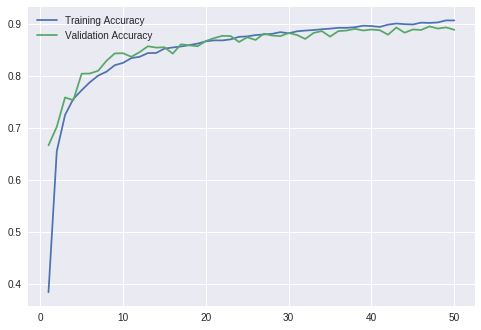

In [0]:
#Entire Program

#Import necessary libraries
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os

#Suppress Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

#Load and separate data into X: Features, Y: Labels
mnist_data = fashion_mnist.load_data()

x = mnist_data[0][0]
y = mnist_data[0][1]

#Set Variables
epochs = 50
num_classes = 10
batch_size = 1028
img_rows, img_cols = 28, 28

#Split data into train & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#Making changes according to Backend
if K.image_data_format() == "channels first":
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
  
#Set astype on data to 'float32'
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 225
x_test /= 224
#Notes
#*Not converting array types into floats increases loss
#*Division seems to have no effect

#Converting class vector to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Defining the model (Hyper-opt: hyperparameter optimization)
# Hyperparams: Kernal size, node amounts, max pool size
model = Sequential()
model.add(Conv2D(32, 5, 5, activation="relu",input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, 5, 5, activation="relu",input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu")) # Hidden layer of plain neurons
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

#Compiling the model
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(), 
              metrics=['accuracy'])

#Setting Early Stopping
my_callbacks = [EarlyStopping(monitor="acc", patience=5, mode=max)]

#Fitting & Evaluating
hist = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_split=0.3, 
                    callbacks=my_callbacks)

score = model.evaluate(x_test, y_test)

print("Testing Loss:", score[0])
print("Testing Accuracy:", score[1])

#Model Summary
model.summary()

#Plotting training accuracy & validation accuracy
epoch_list = list(range(1, len(hist.history['acc']) + 1))
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(("Training Accuracy", "Validation Accuracy"))
plt.show